LOADING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'E:\Data Analytics internship\retail_sales_dataset.csv')

UNDERSTANDING DATA

In [3]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


DATA CLEANING

In [6]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['Total Amount'] = pd.to_numeric(data['Total Amount'].astype('float64'))
data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount               float64
dtype: object

EDA

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp

In [12]:
#Numerical data
data['Total Amount'].describe( )

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

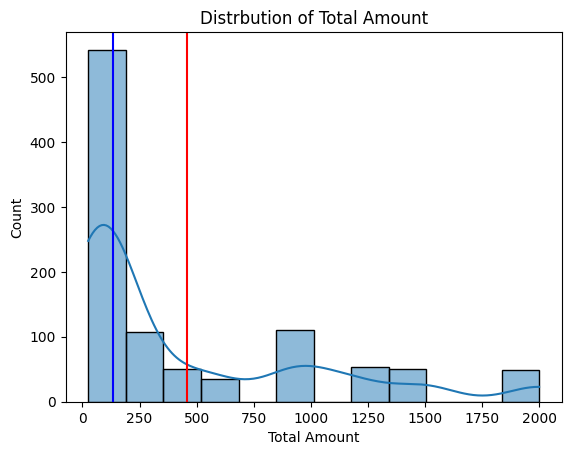

In [16]:
#Data Shape
sns.histplot(data = data, x = data['Total Amount'], kde=True)
plt.title('Distrbution of Total Amount')
plt.axvline(data['Total Amount'].mean(),color = "red")
plt.axvline(data['Total Amount'].median(),color = "blue")

<Axes: xlabel='Total Amount'>

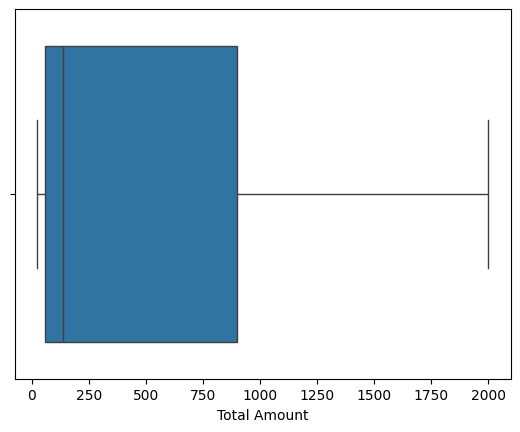

In [17]:
sns.boxplot(data = data,x = data['Total Amount'])

In [18]:
#Categorical data
Pd_Category = data['Product Category'].value_counts()
Pd_Category

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

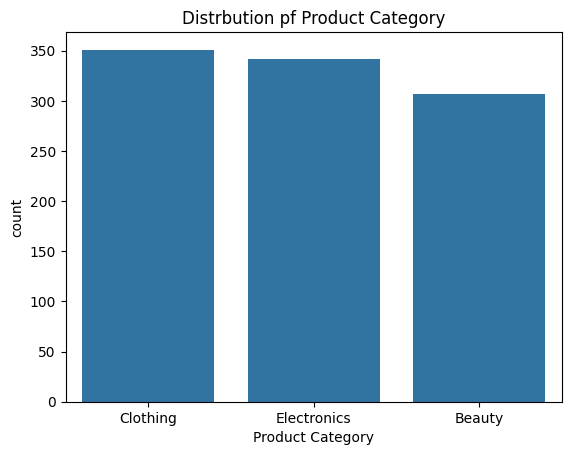

In [23]:
sns.barplot(x = Pd_Category.index, y = Pd_Category.values)
plt.ylabel('count')
plt.title('Distrbution pf Product Category')
plt.show()

TIME SERISE ANALYSIS

In [25]:
data_total = data[['Total Amount','Date']]
data_total = data_total.set_index('Date')
data_total.sample(5)
data_total.groupby('Date')['Total Amount'].sum()
data_total.describe()

,Total Amount
count,1000.000000
mean,456.000000
std,559.997632
min,25.000000
25%,60.000000
50%,135.000000
75%,900.000000
max,2000.000000


<Axes: xlabel='Date'>

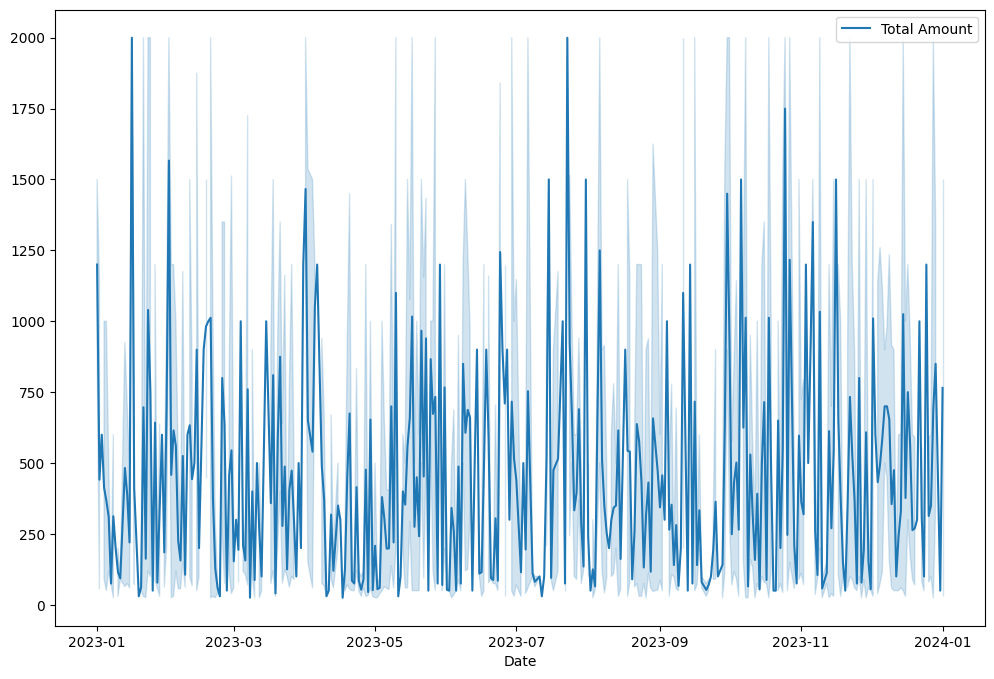

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(data = data_total)

In [29]:
cus_disc = {
    'ID' : data['Customer ID'],
    'Total' : data['Total Amount']
}
cus_disc = pd.DataFrame(cus_disc)

cus_disc = cus_disc.groupby('ID')['Total'].sum().reset_index()

cus_disc = cus_disc.sort_values(by = 'Total',ascending=False)

top_customers = cus_disc.head(10)
print(top_customers)

          ID   Total
14   CUST015  2000.0
412  CUST412  2000.0
970  CUST970  2000.0
547  CUST547  2000.0
281  CUST281  2000.0
416  CUST416  2000.0
420  CUST420  2000.0
927  CUST927  2000.0
447  CUST447  2000.0
342  CUST342  2000.0


<Axes: xlabel='ID', ylabel='Total'>

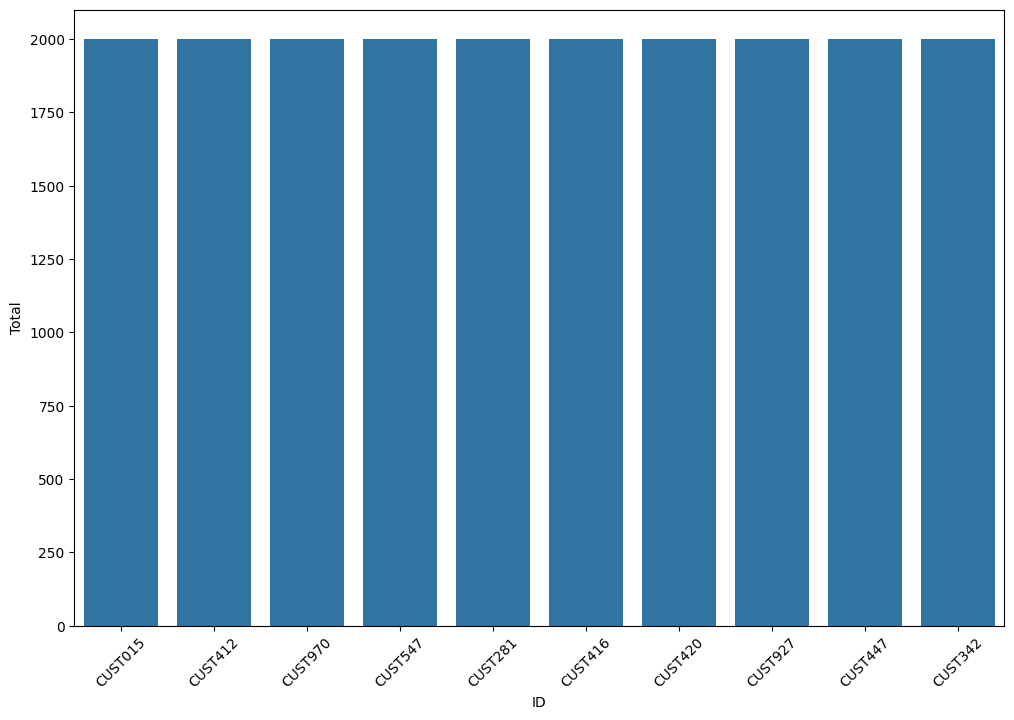

In [30]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(data = top_customers,x='ID',y='Total')
#Top 10 has same values

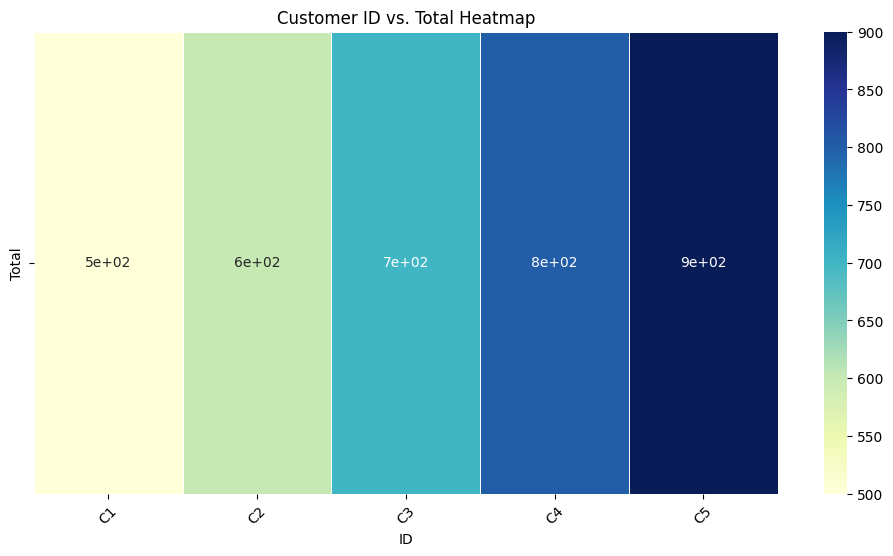

In [33]:
top_customers = pd.DataFrame({
    'ID': ['C1', 'C2', 'C3', 'C4', 'C5'],
    'Total': [500, 600, 700, 800, 900]
})

# Reshape the data: Create a DataFrame with 'ID' as index
heatmap_data = top_customers.set_index('ID').T

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5)

plt.xticks(rotation=45)
plt.title('Customer ID vs. Total Heatmap')
plt.show()
